# Pandas Demos

Because I am constantly forgetting and having to google pandas basics, such as
- File I/O
    - With csv
    - With Excel
- Max columns to display - display all of them always
- Basic statistics
- Dropping and filling nulls
    - In & out of place
- loc and iloc
- filter and query
- Reverse a dataframe top to bottom, left to right
- Dictionaries, series, and frames
    - Converting a dictionary to a series
    - Promoting a series to a frame
    - Adding a series to a frame
    - Dropping rows or columns
- Sample or scramble a dataframe
- Rename a column or columns
- Using apply on
    - A single column
    - A single row
    - All elements
- string operations
- melting
- masking & logical operators
- grouping (groupby)
- Time operations e.g. dates to pandas way of holding dates
- Plotting using pandas built-ins
- Interpolation

## Imports

In [1]:
import pandas as pd

## File I/O

### Read from csv

In [2]:
df = pd.read_csv("./data/auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Write to csv

Make sure to include `index=False` to suppress the index from the file, or you will have inadvertently added a column to the output

In [3]:
df.to_csv("./data/auto-ignore.csv", index=False)

Then read it back and verify equality

In [4]:
df.equals(pd.read_csv("./data/auto-ignore.csv"))

True

### Read from Excel

You need a separate install for Excel

```console
!pip install openpyxl
```

In [5]:
#!pip install openpyxl

In [6]:
df = pd.read_excel("./data/SampleFile.xlsx")
df.head(10)

,Widget A,Widget B
0,2,3
1,36,48
2,16,40
3,5,2
4,31,16
5,34,11
6,19,12
7,4,7
8,4,43
9,36,18


In [7]:
def read_csv(filename_no_extension: str) -> pd.DataFrame:
    """
    Read local csv file from ./data
    """
    return pd.read_csv(f"./data/{filename_no_extension}.csv")

## Max Columns to Display

I usually want to have all the columns displayed
- But the default will show up to 20, after which point interior columns are replaced with a "..."

Read & display a dataset with tons of columns

In [8]:
df = pd.read_csv("./data/coupons.csv")

Notice the ellipsis between maritalStatus and CoffeeHouse

In [9]:
pd.set_option("display.max_columns", 20)
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Now update the max columns - no ellipsis

In [10]:
pd.set_option("display.max_columns", None)
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


## Basic Statistics

Read a dataset and display summary stats per column

In [11]:
df = pd.read_csv("./data/auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### Summarize the Entire Frame

Non-numeric types are automatically excluded

In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Sample Single Operation

Perform an example operation (summation) per column
- This sums all rows, for each column
- Notice the unexpected `name` result - it summed the strings (in python, string summing means concatenating)

In [13]:
df.sum()

mpg                                                        9190.8
cylinders                                                    2145
displacement                                              76209.5
horsepower                                                40952.0
weight                                                    1167213
acceleration                                               6092.2
year                                                        29784
origin                                                        618
name            chevrolet chevelle malibubuick skylark 320plym...
dtype: object

Flip it around, and sum all columns, for each row
- Exclude the `name` column (which has type `object`) because it can't sum with the numeric columns

In [14]:
df.select_dtypes(exclude=object).sum(axis=1)

0      4050.0
1      4313.5
2      4012.0
3      3994.0
4      3997.5
        ...  
387    3145.6
388    2435.6
389    2644.6
390    2957.6
391    3058.4
Length: 392, dtype: float64

Redisplay the first row of the dataframe to verify the summation above

In [15]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu


In [16]:
18 + 8 + 307 + 130 + 3504 + 12 + 70 + 1

4050

## Dropping and Filling Nulls

Empty cells in a table are rendered as NaN in pandas - what to do with them?

### Make a Toy Dataset with a Few Nulls

Also save it to csv

In [17]:
df = pd.DataFrame(
    [
        {
            "name": "Alice",
            "age": 25,
            "ice cream": "chocolate",
            "height": 60.0,
        },
        {
            "name": "Bob",
            "age": 30,
            "height": 66,
        },
        {
            "name": "Charlie",
            "age": 35,
            "ice cream": "vanilla",
        },
        {
            "name": "Sarah",
            "age": 24,
            "ice cream": "rocky road",
            "height": 63.2,
        },
        {
            "name": "Vera",
            "age": 82,
            "ice cream": "black cherry",
        },
    ]
)

df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


In [18]:
df.to_csv("./data/favorite-ice-cream.csv", index=False)

Sidebar: `isna` or `isnull`? They are the same!

In [19]:
df.isna().equals(df.isnull())

True

How many columns have nulls?

In [20]:
(df.isna().sum(axis=0) > 0).sum()

np.int64(2)

Do all columns have nulls?

In [21]:
(df.isna().sum(axis=0) > 0).sum() == df.shape[1]

np.False_

Which columns have nulls?

In [22]:
df.columns[df.isna().sum(axis="rows") > 0].to_list()

['ice cream', 'height']

How many rows have nulls?

In [23]:
(df.isna().sum(axis="columns") > 0).sum()

np.int64(3)

Do all rows have nulls?

In [24]:
(df.isna().sum(axis=1) > 0).sum() == df.shape[0]

np.False_

Drop any rows that contain nulls

In [25]:
df.dropna(inplace=True)
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
3,Sarah,24,rocky road,63.2


Rather than dropping rows containing nulls, replace the nulls with zeros

In [26]:
df = pd.read_csv("./data/favorite-ice-cream.csv").fillna(value=0.0)
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,0.0,66.0
2,Charlie,35,vanilla,0.0
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,0.0


## loc and iloc

Similarly named methods for selecting subsets of a dataframe

What is loc? From pandas:
>Access a group of rows and columns by label(s) or a boolean array.

What is iloc? From pandas:
>Access group of rows and columns by integer position(s).

So iloc is indexing using normal numeric (slice) indexing, whereas loc supports referring to things like index names, and boolean masks
- How to remember it? **i** <-> **i**loc <-> **i**nteger <-> **i**ndex

### loc

Some loc examples

In [27]:
# Set the index as the name
df = pd.read_csv("./data/favorite-ice-cream.csv", index_col="name")
df

,age,ice cream,height
name,,,
Alice,25,chocolate,60.0
Bob,30,NaN,66.0
Charlie,35,vanilla,NaN
Sarah,24,rocky road,63.2
Vera,82,black cherry,NaN


Select only the first 2 rows

In [28]:
df.loc[["Alice", "Bob"]]

,age,ice cream,height
name,,,
Alice,25,chocolate,60.0
Bob,30,NaN,66.0


Select only the first 2 columns of Bob and Charlie rows

In [29]:
df.loc[["Bob", "Charlie"], ["age", "ice cream"]]

,age,ice cream
name,,
Bob,30,NaN
Charlie,35,vanilla


Select only those rows where the age is greater than 30

In [30]:
df.loc[df["age"] > 30]

,age,ice cream,height
name,,,
Charlie,35,vanilla,NaN
Vera,82,black cherry,NaN


### iloc (i = integer = index)

Some iloc examples. Reset the index

In [31]:
df.reset_index(inplace=True)
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


Select only the first 2 rows

In [32]:
df.iloc[:2, :]

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0


Select only the first 3 columns of Bob and Charlie rows

In [33]:
df.iloc[1:3, :3]

,name,age,ice cream
1,Bob,30,NaN
2,Charlie,35,vanilla


## Filter and Query

Methods for selecting subsets of a dataframe based on conditions
- Filter: select specific columns
- Query: select specific rows

In [34]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


### Filter

Columns named age or height

In [35]:
df.filter(items=["age", "height"])

,age,height
0,25,60.0
1,30,66.0
2,35,NaN
3,24,63.2
4,82,NaN


Rows where the value for ice cream contains the substring "la"

In [36]:
df.set_index("ice cream").filter(like="la", axis=0).reset_index()

,ice cream,name,age,height
0,chocolate,Alice,25,60.0
1,vanilla,Charlie,35,NaN
2,black cherry,Vera,82,NaN


### Query

One condition: choose people aged 30 and under

In [37]:
df.query("age <= 30")

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
3,Sarah,24,rocky road,63.2


Another condition: choose people aged 30 and under with heights greater than 60 inches

In [38]:
df.query("age <= 30 and height > 60")

,name,age,ice cream,height
1,Bob,30,NaN,66.0
3,Sarah,24,rocky road,63.2


Query based on inclusion (lists). Choose people that like chocolate or vanilla ice cream
- Notice the need for backtick quoting the column `ice cream` because it has a space in it

In [39]:
flavors = ["chocolate", "vanilla"]
df.query("`ice cream` in @flavors")

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
2,Charlie,35,vanilla,NaN


## Reverse a Dataframe

### Top to Bottom

In [40]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


In [41]:
df[::-1]

,name,age,ice cream,height
4,Vera,82,black cherry,NaN
3,Sarah,24,rocky road,63.2
2,Charlie,35,vanilla,NaN
1,Bob,30,NaN,66.0
0,Alice,25,chocolate,60.0


### Left to Right

In [42]:
df.iloc[:, ::-1]

,height,ice cream,age,name
0,60.0,chocolate,25,Alice
1,66.0,NaN,30,Bob
2,NaN,vanilla,35,Charlie
3,63.2,rocky road,24,Sarah
4,NaN,black cherry,82,Vera


## Dictionaries, Series, and Frames


Convert a dictionary to series
- The dtype is the datatype for all values, if all the same type
- Or object, i.e. mixed, if not all same type

In [43]:
pd.Series(
    data={
        "name": "Fred",
        "has feathers": False,
        "age": 6.44,
    }
)

name             Fred
has feathers    False
age              6.44
dtype: object

Promote a series to a column of a frame

In [44]:
pd.Series(
    data={
        "name": "Fred",
        "has feathers": False,
        "age": 6.44,
    }
).to_frame()

,0
name,Fred
has feathers,False
age,6.44


Promote a series to a row of a frame

In [45]:
pd.Series(
    data={
        "name": "Fred",
        "has feathers": False,
        "age": 6.44,
    }
).to_frame().transpose()

,name,has feathers,age
0,Fred,False,6.44


Add a series as new column in a frame, using `insert`

In [46]:
df = pd.Series(
    data={
        "name": "Fred",
        "has feathers": False,
        "age": 6.44,
    }
).to_frame(name="First Pet")
df.insert(
    loc=1,
    column="Second Pet",
    value=pd.Series(
        data={
            "name": "Pete",
            "has feathers": True,
            "age": 2.66,
        }
    ),
)

df

,First Pet,Second Pet
name,Fred,Pete
has feathers,False,True
age,6.44,2.66


Add a series as new row in a frame, using `concat`
- Notice this requires the promotion of the series to a frame before it can be concatenated

In [47]:
pd.concat(
    [
        pd.DataFrame(
            {
                "name": ["Fred"],
                "has feathers": [False],
                "age": [6.44],
            }
        ),
        pd.Series(
            data={
                "name": "Pete",
                "has feathers": True,
                "age": 2.66,
            }
        )
        .to_frame()
        .transpose(),
    ],
    ignore_index=True,
)

,name,has feathers,age
0,Fred,False,6.44
1,Pete,True,2.66


Add a series as new row in a frame, using `loc`

In [48]:
df = (
    pd.Series(
        data={
            "name": "Fred",
            "has feathers": False,
            "age": 6.44,
        }
    )
    .to_frame()
    .transpose()
)

df.loc[len(df)] = pd.Series(
    data={
        "name": "Pete",
        "has feathers": True,
        "age": 2.66,
    }
)

df

,name,has feathers,age
0,Fred,False,6.44
1,Pete,True,2.66


Drop a row

In [49]:
df.drop(index=1)

,name,has feathers,age
0,Fred,False,6.44


Drop a column

In [50]:
df.drop(columns="age")

,name,has feathers
0,Fred,False
1,Pete,True


Drop two columns

In [51]:
df.drop(columns=["name", "age"])

,has feathers
0,False
1,True


## Sample or Scramble a Frame


In [52]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


Choose a random row

In [53]:
df.sample(1, random_state=42)

,name,age,ice cream,height
1,Bob,30,NaN,66.0


Choose 2 random rows

In [54]:
df.sample(2, random_state=42)

,name,age,ice cream,height
1,Bob,30,NaN,66.0
4,Vera,82,black cherry,NaN


Scramble the frame, i.e. randomize its row order
- Same as randomly choosing all rows

In [55]:
df.sample(len(df), random_state=42)

,name,age,ice cream,height
1,Bob,30,NaN,66.0
4,Vera,82,black cherry,NaN
2,Charlie,35,vanilla,NaN
0,Alice,25,chocolate,60.0
3,Sarah,24,rocky road,63.2


## Renaming Columns


In [56]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


Change `height` to `height in inches` with `rename`

In [57]:
df.rename(columns={"height": "height in inches"})

,name,age,ice cream,height in inches
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


Change `height` to `height in inches` by modifying the columns property

In [58]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
columns = df.columns.to_list()
columns[df.columns.get_loc("height")] = "height in inches"
df.columns = columns
df

,name,age,ice cream,height in inches
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


## Using Apply Function

For operating functions on rows or columns of the frame


In [59]:
df = pd.read_csv("./data/favorite-ice-cream.csv")
df

,name,age,ice cream,height
0,Alice,25,chocolate,60.0
1,Bob,30,NaN,66.0
2,Charlie,35,vanilla,NaN
3,Sarah,24,rocky road,63.2
4,Vera,82,black cherry,NaN


Add an arbitrary value to all numeric types

In [60]:
df.select_dtypes(exclude=object).apply(lambda x: x + 2.22)

,age,height
0,27.22,62.22
1,32.22,68.22
2,37.22,NaN
3,26.22,65.42
4,84.22,NaN


Print every row
- The promotion to a frame is just to make the prints look nicer

In [61]:
_ = df.apply(lambda x: display(x.to_frame().transpose()), axis=1)

,name,age,ice cream,height
0,Alice,25,chocolate,60.0


,name,age,ice cream,height
1,Bob,30,NaN,66.0


,name,age,ice cream,height
2,Charlie,35,vanilla,NaN


,name,age,ice cream,height
3,Sarah,24,rocky road,63.2


,name,age,ice cream,height
4,Vera,82,black cherry,NaN


Print every column as a data frame

In [62]:
_ = df.apply(lambda x: display(x.to_frame()), axis=0)

,name
0,Alice
1,Bob
2,Charlie
3,Sarah
4,Vera


,age
0,25
1,30
2,35
3,24
4,82


,ice cream
0,chocolate
1,NaN
2,vanilla
3,rocky road
4,black cherry


,height
0,60.0
1,66.0
2,NaN
3,63.2
4,NaN


## Plotting

Load tesla stock data

In [63]:
df = pd.read_csv("./data/tsla.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
1,2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2,2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
3,2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
4,2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...,...
510,2022-01-10,1059.099976,980.000000,1000.000000,1058.119995,30605000.0,1058.119995
511,2022-01-11,1075.849976,1038.819946,1053.670044,1064.400024,22021100.0,1064.400024
512,2022-01-12,1114.839966,1072.589966,1078.849976,1106.219971,27913000.0,1106.219971
513,2022-01-13,1115.599976,1026.540039,1109.069946,1031.560059,32403300.0,1031.560059


In [65]:
import matplotlib.pyplot as plt

Plot opening price vs. date

<Axes: xlabel='Date'>

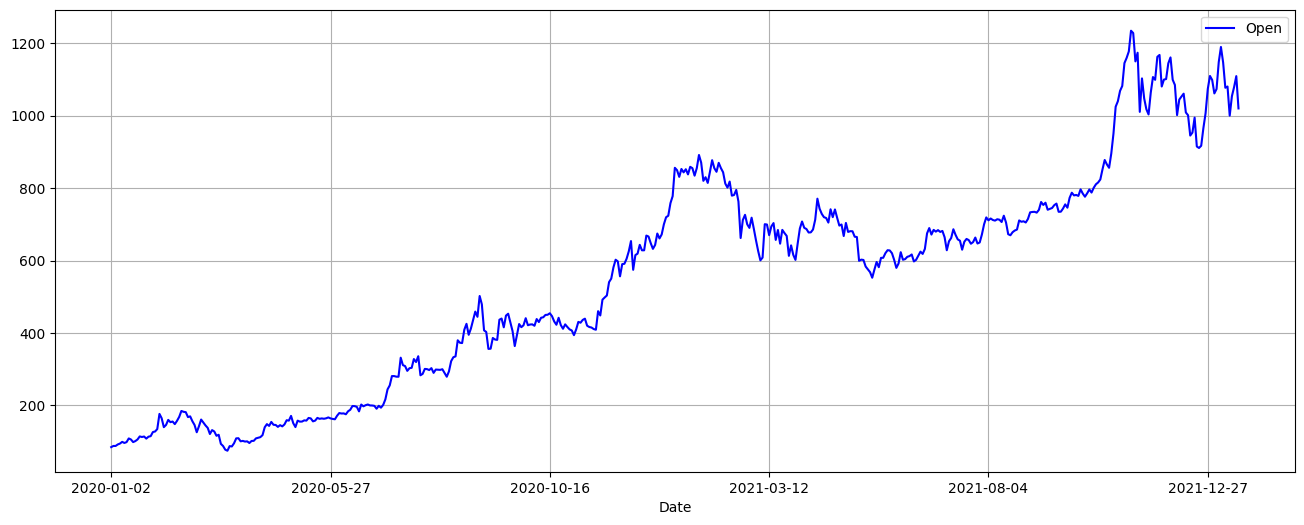

In [73]:
_, ax = plt.subplots(figsize=(16,6))
df.plot(x="Date", y="Open", color="blue", kind="line", grid=True, ax=ax)